<a href="https://colab.research.google.com/github/Kaustav9820/Kaustavs-codes/blob/main/diabetes_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
 
uploaded = files.upload()
 
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving diabetes.csv to diabetes.csv
User uploaded file "diabetes.csv" with length 23873 bytes


In [2]:
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [3]:
df=pd.read_csv(io.BytesIO(uploaded['diabetes.csv']))

In [4]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [6]:
df.isnull().any

<bound method DataFrame.any of      Pregnancies  Glucose  ...    Age  Outcome
0          False    False  ...  False    False
1          False    False  ...  False    False
2          False    False  ...  False    False
3          False    False  ...  False    False
4          False    False  ...  False    False
..           ...      ...  ...    ...      ...
763        False    False  ...  False    False
764        False    False  ...  False    False
765        False    False  ...  False    False
766        False    False  ...  False    False
767        False    False  ...  False    False

[768 rows x 9 columns]>

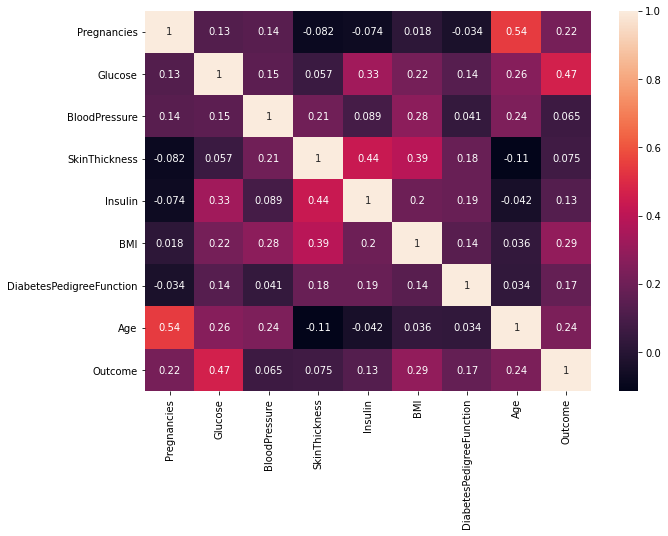

In [9]:
corr=df.corr()
plt.figure(figsize=(10,7))
sn.heatmap(corr,annot=True)

In [11]:
for i in range(df.shape[1]):
  df.iloc[:,i]=df.iloc[:,i].fillna(df.iloc[:,i].median())

In [13]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
w=sm.add_constant(df)
vif=pd.DataFrame([variance_inflation_factor(w.values,i) for i in range(w.shape[1])])
vif

,0
0,39.646259
1,1.461247
2,1.525018
3,1.194716
4,1.507471
5,1.430267
6,1.366240
7,1.082105
8,1.594364
9,1.435241


In [22]:
 
from scipy import stats
df_z=np.abs(stats.zscore(df))
df_z

array([[0.63994726, 0.84832379, 0.14964075, ..., 0.46849198, 1.4259954 ,
        1.36589591],
       [0.84488505, 1.12339636, 0.16054575, ..., 0.36506078, 0.19067191,
        0.73212021],
       [1.23388019, 1.94372388, 0.26394125, ..., 0.60439732, 0.10558415,
        1.36589591],
       ...,
       [0.3429808 , 0.00330087, 0.14964075, ..., 0.68519336, 0.27575966,
        0.73212021],
       [0.84488505, 0.1597866 , 0.47073225, ..., 0.37110101, 1.17073215,
        1.36589591],
       [0.84488505, 0.8730192 , 0.04624525, ..., 0.47378505, 0.87137393,
        0.73212021]])

In [24]:
df_n=df[(df_z<3).all(axis=1)]
df_n

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [32]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression (max_iter=1000)
from sklearn.model_selection import train_test_split

In [33]:
Y=df_n['Outcome']
X=df_n.drop('Outcome',axis=1)
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
5,5,116,74,0,0,25.6,0.201,30
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [37]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)
lg.fit(X_train, y_train)
lg.score(X_train,y_train)

0.7945454545454546

In [68]:
yp=lg.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(yp,y_test)

0.782608695652174

In [69]:
confusion_matrix(yp,y_test)

array([[84, 20],
       [10, 24]])

In [73]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier (criterion='entropy')
tree.fit(X_train,y_train)
tree.score(X_train,y_train)

1.0

In [74]:
y_pred=tree.predict(X_test)
accuracy_score(y_pred,y_test)

0.6811594202898551

In [79]:
path=tree.cost_complexity_pruning_path(X_train,y_train)
ccp_alphas=path['ccp_alphas']
ccp_alphas

array([0.        , 0.00363636, 0.00484848, 0.00500889, 0.00500889,
       0.00500889, 0.00500889, 0.00500889, 0.00500889, 0.00526442,
       0.00545455, 0.00585324, 0.0059002 , 0.0059002 , 0.0059002 ,
       0.00597628, 0.00597628, 0.00597628, 0.0062751 , 0.00651794,
       0.00656298, 0.0070014 , 0.00709115, 0.00709115, 0.00727273,
       0.00741678, 0.00746955, 0.00753038, 0.00753038, 0.00756448,
       0.00795325, 0.00817753, 0.00862495, 0.00870066, 0.00891384,
       0.00905536, 0.00906791, 0.00908016, 0.00910021, 0.00937622,
       0.00981207, 0.00991719, 0.00997612, 0.01039594, 0.01103502,
       0.01112062, 0.01401698, 0.01543995, 0.01820286, 0.02028527,
       0.02763816, 0.04341411, 0.04490092, 0.12934683])

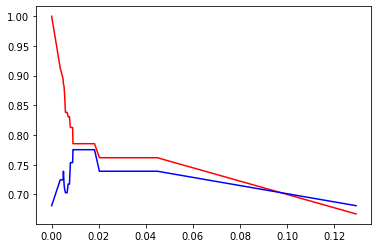

In [83]:
accuracy_train,accuracy_test=[],[]
for i in ccp_alphas:
  tree=DecisionTreeClassifier (ccp_alpha=i)
  tree.fit(X_train,y_train)
  y1=tree.predict(X_train)
  y2=tree.predict(X_test)
  accuracy_train.append(accuracy_score(y1,y_train))
  accuracy_test.append(accuracy_score(y2,y_test))
 
sn.lineplot(y=accuracy_train,x=ccp_alphas,color='red')
sn.lineplot(y=accuracy_test,x=ccp_alphas,color='blue')

In [90]:
tree=DecisionTreeClassifier (ccp_alpha=0.01)
tree.fit(X_train,y_train)
tree.score(X_train,y_train)

0.7854545454545454

In [86]:
yp=tree.predict(X_test)
accuracy_score(yp,y_test)

0.7753623188405797

In [88]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB ()
gnb.fit(X_train,y_train)
gnb.score(X_train,y_train)

0.7563636363636363

In [89]:
yp=gnb.predict(X_test)
accuracy_score(yp,y_test)

0.7536231884057971

In [117]:
from sklearn.neighbors import KNeighborsClassifier
test_score=[]
for i in range(3,19):
 knn=KNeighborsClassifier (n_neighbors=i)
 knn.fit(X_train,y_train)
 yp=knn.predict(X_test)
 test_score.append(accuracy_score(yp,y_test))
print(np.argmax(test_score)+3)

13


In [119]:
knn=KNeighborsClassifier (n_neighbors=13)
knn.fit(X_train,y_train)
yp=knn.predict(X_test)
accuracy_score(yp,y_test)

0.7681159420289855

In [123]:
from sklearn import svm
clf=svm.SVC(kernel='linear')
clf.fit(X_train,y_train)
clf.score(X_train, y_train)

0.7927272727272727

In [124]:
yp=clf.predict(X_test)
accuracy_score(yp,y_test)

0.7681159420289855

In [125]:
from sklearn import svm
clf=svm.SVC(kernel='rbf')
clf.fit(X_train,y_train)
clf.score(X_train, y_train)

0.7672727272727272

In [126]:
yp=clf.predict(X_test)
accuracy_score(yp,y_test)

0.7753623188405797

In [157]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

In [158]:
from sklearn.model_selection import cross_val_score as cvs
svm_score1=cvs(svm.SVC(kernel='rbf'),X,Y,cv=5)
svm_score1.mean()

0.7558447053845341

In [159]:
svm_score2=cvs(svm.SVC(kernel='linear'),X,Y,cv=5)
svm_score2.mean()

0.7820480270813499

In [160]:
tree_score=cvs(DecisionTreeClassifier (ccp_alpha=0.01),X,Y,cv=5)
tree_score.mean()

0.7544800592404528

In [161]:
knn_score=cvs(KNeighborsClassifier(n_neighbors=13),X,Y,cv=5)
knn_score.mean()

0.757325716703692

In [162]:
naive_score=cvs(GaussianNB(),X,Y,cv=5)
naive_score.mean()

0.7573574526605309

In [163]:
 
from sklearn.naive_bayes import MultinomialNB
naive_score2=cvs(MultinomialNB(),X,Y,cv=5)
naive_score2.mean()

0.6133502591769809

In [164]:
log_score=cvs(LogisticRegression (max_iter=1000),X,Y,cv=5)
log_score.mean()

0.7834867237913891

In [165]:
print("From the above scores, we conclude that LogisticRegression gives the best result for the dataset")

From the above scores, we conclude that LogisticRegression gives the best result for the dataset
